# Transform in GJF

Continuing to a higher level of optimization based on the optimized structure is a very common step in quantum chemistry computational workflows. MolOP provides some simple interfaces to simplify the manpower required for this step.

An GJF file example

```
%nprocshared=32
%mem=60GB
# opt=(modredundant,maxcycle=150) freq b3lyp/genecp
empiricaldispersion=gd3bj

Title Card Required

0 3
C      0.000000    0.000000    0.000000
C      2.307938    0.000000    0.000000
C      0.551281    1.455665    0.000000
H     -0.534948   -0.259711    0.912472
H      0.285704    2.016486   -0.895964
H      0.278983    2.038113    0.877842
H     -0.583783   -0.246039   -0.885189
N      2.047530    1.259741    0.008719
O      1.243330   -0.862692   -0.039545
C      6.760990    0.754338    1.457474
C      4.696381    0.278635    0.542206
C      5.943716    2.058450    1.244045
H      7.640334    0.698190    0.816078
H      5.677849    2.549412    2.181628
H      6.448703    2.757574    0.572429
H      7.014602    0.553909    2.496806
N      4.665040    1.565793    0.595429
O      5.823460   -0.343458    1.010135
C      3.669713   -0.627992   -0.076903
Cu     3.328877    2.665479   -0.156937
C      3.669647   -2.004753    0.618788
H      3.418008   -1.901497    1.677888
H      2.927090   -2.643755    0.139759
H      4.662067   -2.447796    0.532686
C      4.032693   -0.776346   -1.592101
H      5.011220   -1.257391   -1.673191
H      3.276414   -1.398086   -2.078448
H      4.072352    0.208312   -2.067119
Cl     1.984177    4.360351    0.662558
C      4.248440    3.374850   -1.648000
C      3.512436    4.138486   -2.590439
C      5.351886    2.615216   -2.213984
C      3.833929    4.212685   -3.960867
H      2.670980    4.722276   -2.226903
C      5.679945    2.648866   -3.535885
H      5.948133    2.004560   -1.548212
C      3.087301    5.007282   -4.877240
C      4.943160    3.452355   -4.465498
H      6.505340    2.052703   -3.915505
C      3.420661    5.047067   -6.214080
H      2.252792    5.586396   -4.497123
C      5.259272    3.513231   -5.837046
C      4.514823    4.296129   -6.703083
H      2.845527    5.659514   -6.898918
H      6.102062    2.937454   -6.205614
H      4.768346    4.338520   -7.755516
C      5.060314    4.865996   -0.477921
C      5.240120    5.316797    0.956396
C      3.920694    5.650205   -1.060827
H      6.085619    6.027416    1.054496
H      4.342828    5.850493    1.313600
H      5.417306    4.417944    1.564324
H      4.093230    6.744897   -1.056296
H      3.054893    5.495011   -0.349155
H      3.596217    5.319376   -2.048973
N      6.305899    4.994915   -1.164331
C      6.919490    6.261898   -0.982562
C      7.155876    3.867002   -1.123161
H      7.978195    6.257478   -0.730739
H      6.374238    6.806878   -0.168969
H      6.773673    6.850107   -1.931221
H      7.117626    3.362632   -2.124633
H      8.219510    4.067568   -0.925336
H      6.786111    3.155320   -0.341766

B 31 39 F

-H -Li -Na -K -Mg -B -Al -C -Si -N -P -O -S -F -Cl 0
6-31G*
****
-Cs -Fe -Co -Ni -Cu -Ag -Au -Pd -Ru -Rh -Os -Ir -Pt -Br -I 0
lanl2dz
****

-Cs -Fe -Co -Ni -Cu -Ag -Au -Pd -Ru -Rh -Os -Ir -Pt -Br -I 0
lanl2dz
```

The structure of GJF is:

- prefix (calculation parameters)
- title
- charge and multiplicity
- atoms and coords
- suffix (basis sets or more)

Load some files

In [1]:
from molop import AutoParser
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # for better drawing

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400

files = AutoParser("../../tests/test_files/g16log/*.log")

MolOP parsing with 16 jobs: 100%|██████████| 41/41 [00:03<00:00, 12.30it/s]
0 files failed to parse, 41 successfully parsed


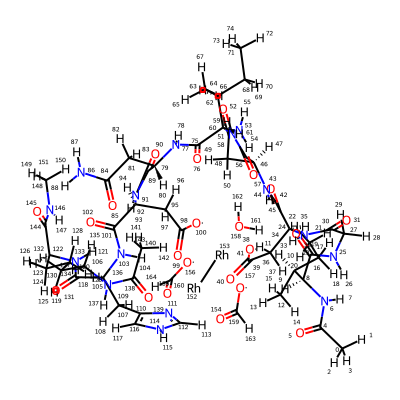

In [2]:
files[0][-1].rdmol

MolOP offers some functions to transform the molecule into customized gjf file.

In [3]:
print(
    files[0][0].to_GJF_block(
        # If specified, will be used to overwrite the charge in the gjf file
        charge=None,
        # If specified, will be used to overwrite the multiplicity in the gjf file
        multiplicity=None,
        # path to read a gjf file as a template
        template=None,
        # prefix to add to the beginning of the gjf file, priority is lower than template
        prefix="# g16 gjf",
        # suffix to add to the end of the gjf file, priority is lower than template
        suffix="some basis",
        # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
        chk=True,
        # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
        oldchk=True,
    )
)

%chk=111.chk
%oldchk=111.chk
# g16 gjf

 Title: 111

0 3
C            7.06321  -5.54529   2.06170
H            7.99421  -5.10649   2.43480
H            6.67071  -6.22939   2.82260
H            7.27431  -6.13649   1.16730
C            5.99551  -4.51489   1.72790
O            5.02281  -4.78789   1.03910
N            6.21201  -3.25459   2.24830
H            6.94850  -3.16189   2.93620
C            5.17350  -2.22519   2.24680
H            4.29810  -2.66809   1.75940
C            4.74950  -1.78379   3.67480
H            3.99800  -1.00159   3.52130
C            4.07500  -2.94789   4.41400
H            3.22971  -3.33439   3.83540
H            4.77551  -3.77389   4.59270
H            3.68830  -2.62479   5.38510
C            5.91680  -1.15839   4.46910
H            6.44270  -0.43699   3.82880
H            6.65120  -1.93589   4.73500
C            5.48030  -0.43709   5.75080
H            5.01750  -1.12169   6.46930
H            6.33910   0.02991   6.24590
H            4.75390   0.35191   5.52400


Use template

In [4]:
print(
    files[0][0].to_GJF_block(
        # If specified, will be used to overwrite the charge in the gjf file
        charge=1,
        # If specified, will be used to overwrite the multiplicity in the gjf file
        multiplicity=3,
        # path to read a gjf file as a template
        template="../../tests/test_files/g16gjf/test.gjf",
        # prefix to add to the beginning of the gjf file, priority is lower than template
        prefix="# g16 gjf",
        # suffix to add to the end of the gjf file, priority is lower than template
        suffix="some basis",
        # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
        chk=True,
        # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
        oldchk=True,
    )
)

%nprocshared=32
%mem=60GB
%chk=111.chk
%oldchk=111.chk
# opt=(modredundant,maxcycle=150) freq b3lyp/genecp empiricaldispersion=gd3bj  

 Title: 111

1 3
C            7.06321  -5.54529   2.06170
H            7.99421  -5.10649   2.43480
H            6.67071  -6.22939   2.82260
H            7.27431  -6.13649   1.16730
C            5.99551  -4.51489   1.72790
O            5.02281  -4.78789   1.03910
N            6.21201  -3.25459   2.24830
H            6.94850  -3.16189   2.93620
C            5.17350  -2.22519   2.24680
H            4.29810  -2.66809   1.75940
C            4.74950  -1.78379   3.67480
H            3.99800  -1.00159   3.52130
C            4.07500  -2.94789   4.41400
H            3.22971  -3.33439   3.83540
H            4.77551  -3.77389   4.59270
H            3.68830  -2.62479   5.38510
C            5.91680  -1.15839   4.46910
H            6.44270  -0.43699   3.82880
H            6.65120  -1.93589   4.73500
C            5.48030  -0.43709   5.75080
H            5.01750  -1.12

For file level, MolOP offers the similar functions

In [5]:
print(
    files[0].to_GJF_block(
        # If specified, will be used to overwrite the charge in the gjf file
        charge=1,
        # If specified, will be used to overwrite the multiplicity in the gjf file
        multiplicity=3,
        # path to read a gjf file as a template
        template="../../tests/test_files/g16gjf/test.gjf",
        # prefix to add to the beginning of the gjf file, priority is lower than template
        prefix="# g16 gjf",
        # suffix to add to the end of the gjf file, priority is lower than template
        suffix="some basis",
        # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
        chk=True,
        # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
        oldchk=True,
        # If specified, will use the frameID to get the coords, default is -1
        frameID=-1,
    )
)

%nprocshared=32
%mem=60GB
%chk=111.chk
%oldchk=111.chk
# opt=(modredundant,maxcycle=150) freq b3lyp/genecp empiricaldispersion=gd3bj  

 Title: 111

1 3
C            7.06321  -5.54529   2.06170
H            7.99421  -5.10649   2.43480
H            6.67071  -6.22939   2.82260
H            7.27431  -6.13649   1.16730
C            5.99551  -4.51489   1.72790
O            5.02281  -4.78789   1.03910
N            6.21201  -3.25459   2.24830
H            6.94850  -3.16189   2.93620
C            5.17350  -2.22519   2.24680
H            4.29810  -2.66809   1.75940
C            4.74950  -1.78379   3.67480
H            3.99800  -1.00159   3.52130
C            4.07500  -2.94789   4.41400
H            3.22971  -3.33439   3.83540
H            4.77551  -3.77389   4.59270
H            3.68830  -2.62479   5.38510
C            5.91680  -1.15839   4.46910
H            6.44270  -0.43699   3.82880
H            6.65120  -1.93589   4.73500
C            5.48030  -0.43709   5.75080
H            5.01750  -1.12

Functions above both have to-file vesion.

In [6]:
files[0][0].to_GJF_file(
    # If not specified, will be generated in situ
    file_path="../../tests/test_files/temp/test.gjf",
    # If specified, will be used to overwrite the charge in the gjf file
    charge=1,
    # If specified, will be used to overwrite the multiplicity in the gjf file
    multiplicity=3,
    # path to read a gjf file as a template
    template="../../tests/test_files/g16gjf/test.gjf",
    # prefix to add to the beginning of the gjf file, priority is lower than template
    prefix="# g16 gjf",
    # suffix to add to the end of the gjf file, priority is lower than template
    suffix="some basis",
    # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
    chk=True,
    # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
    oldchk=True,
)
# return the file path saved to

'/home/tmj/proj/MolOP/tests/test_files/temp/test.gjf'

In [7]:
files[0].to_GJF_file(
    # If not specified, will be generated in situ
    file_path="../../tests/test_files/temp/test.gjf",
    # If specified, will be used to overwrite the charge in the gjf file
    charge=1,
    # If specified, will be used to overwrite the multiplicity in the gjf file
    multiplicity=3,
    # path to read a gjf file as a template
    template="../../tests/test_files/g16gjf/test.gjf",
    # prefix to add to the beginning of the gjf file, priority is lower than template
    prefix="# g16 gjf",
    # suffix to add to the end of the gjf file, priority is lower than template
    suffix="some basis",
    # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
    chk=True,
    # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
    oldchk=True,
    # If specified, will use the frameID to get the coords, default is -1
    frameID=-1,
)
# return the file path saved to

'/home/tmj/proj/MolOP/tests/test_files/temp/test.gjf'

FileBatch level offers a function to transform in batch

In [8]:
files.to_GJF_file(
    # If not specified, will be generated the work directory
    file_path="../../tests/test_files/temp",
    # If specified, will be used to overwrite the charge in the gjf file
    charge=1,
    # If specified, will be used to overwrite the multiplicity in the gjf file
    multiplicity=3,
    # path to read a gjf file as a template
    template="../../tests/test_files/g16gjf/test.gjf",
    # prefix to add to the beginning of the gjf file, priority is lower than template
    prefix="# g16 gjf",
    # suffix to add to the end of the gjf file, priority is lower than template
    suffix="some basis",
    # If true, add the chk keyword to the link0 section. Will use the file name as the chk file name.
    chk=True,
    # If true, add the oldchk keyword to the link0 section. Will use the file name as the chk file name.
    oldchk=True,
    # If specified, will use the frameID to get the coords, default is -1
    frameID=-1,
)

gjf files saved to /home/tmj/proj/MolOP/tests/test_files/temp
